## Question 1.

Import the data located at this link. It has information on people infected with dengue at the district level for 2015 to 2021.

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np
import matplotlib.pyplot as plt 
import chardet
import os

In [2]:
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Point, LineString
import folium 
from folium import Marker, GeoJson
from folium.plugins import MarkerCluster, HeatMap

In [3]:
det = chardet.detect(open('../../_data/data_dengue_peru.csv', 'rb').read())
charenc = det['encoding']

In [4]:
main_data = pd.read_csv('../../_data/data_dengue_peru.csv', encoding=charenc, low_memory=False)

## Question 2.

Generate ubigeo for Departments and Provinces taking the first two and four numbers. Hint: Use this code.

In [5]:
main_data["Ubigeo_String"] = main_data["Ubigeo"].astype(str)

main_data["Ubigeo_Largo"] = main_data["Ubigeo_String"].str.len()

In [6]:
df5 = main_data[main_data["Ubigeo_Largo"] == 5]
df5["Ubigeo_String"] = df5["Ubigeo_String"].str.zfill(6)

C:\Users\User\AppData\Local\Temp\ipykernel_18240\3164714844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5["Ubigeo_String"] = df5["Ubigeo_String"].str.zfill(6)


In [7]:
df6 = main_data[main_data["Ubigeo_Largo"] == 6]

In [8]:
new_data = pd.concat([df5, df6])

In [9]:
new_data["Ubigeo_Departamento"] = new_data["Ubigeo_String"].str[0:2]
new_data["Ubigeo_Provincia"] = new_data["Ubigeo_String"].str[0:4]

In [11]:
new_data_2021= new_data[new_data["Año"] == 2021]
new_data_2021.Casos = new_data_2021.Casos.fillna(0).replace(',', '', regex=True).astype(int)
new_data.Casos = new_data.Casos.fillna(0).replace(',', '', regex=True).astype(int)

C:\Users\User\AppData\Local\Temp\ipykernel_18240\3161228363.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_2021.Casos = new_data_2021.Casos.fillna(0).replace(',', '', regex=True).astype(int)


In [12]:
dist_2021_dengue = new_data_2021.groupby( ['Ubigeo_String'], as_index = False )[['Casos']] \
                            .sum()

In [13]:
dist_2021_dengue = dist_2021_dengue.rename(columns={'Ubigeo_String': 'UBIGEO'})


## Question 3.

Use geopandas to plot the number of cases in 2021 by the district using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile.

In [19]:
maps = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [20]:
maps = maps[['UBIGEO', 'geometry']]
maps['UBIGEO'] = maps['UBIGEO']


In [21]:
map_dist = maps.merge(dist_2021_dengue, how="outer", on="UBIGEO")
map_dist

,UBIGEO,geometry,Casos
0,060504,"POLYGON ((-78.91578 -7.32085, -78.91370 -7.322...",NaN
1,061105,"POLYGON ((-79.01679 -6.96945, -79.01581 -6.969...",NaN
2,061109,"POLYGON ((-79.21691 -6.85171, -79.21576 -6.851...",NaN
3,061110,"POLYGON ((-79.08233 -7.00544, -79.08041 -7.005...",NaN
4,061203,"POLYGON ((-78.87623 -7.09747, -78.87471 -7.098...",NaN
...,...,...,...
1869,040404,"POLYGON ((-71.95148 -14.83836, -71.95157 -14.8...",NaN
1870,040405,"POLYGON ((-72.37490 -15.24990, -72.37494 -15.2...",NaN
1871,040406,"POLYGON ((-71.96976 -15.13597, -71.96952 -15.1...",NaN
1872,040407,"POLYGON ((-72.31258 -15.81426, -72.31211 -15.8...",NaN


<Axes: >

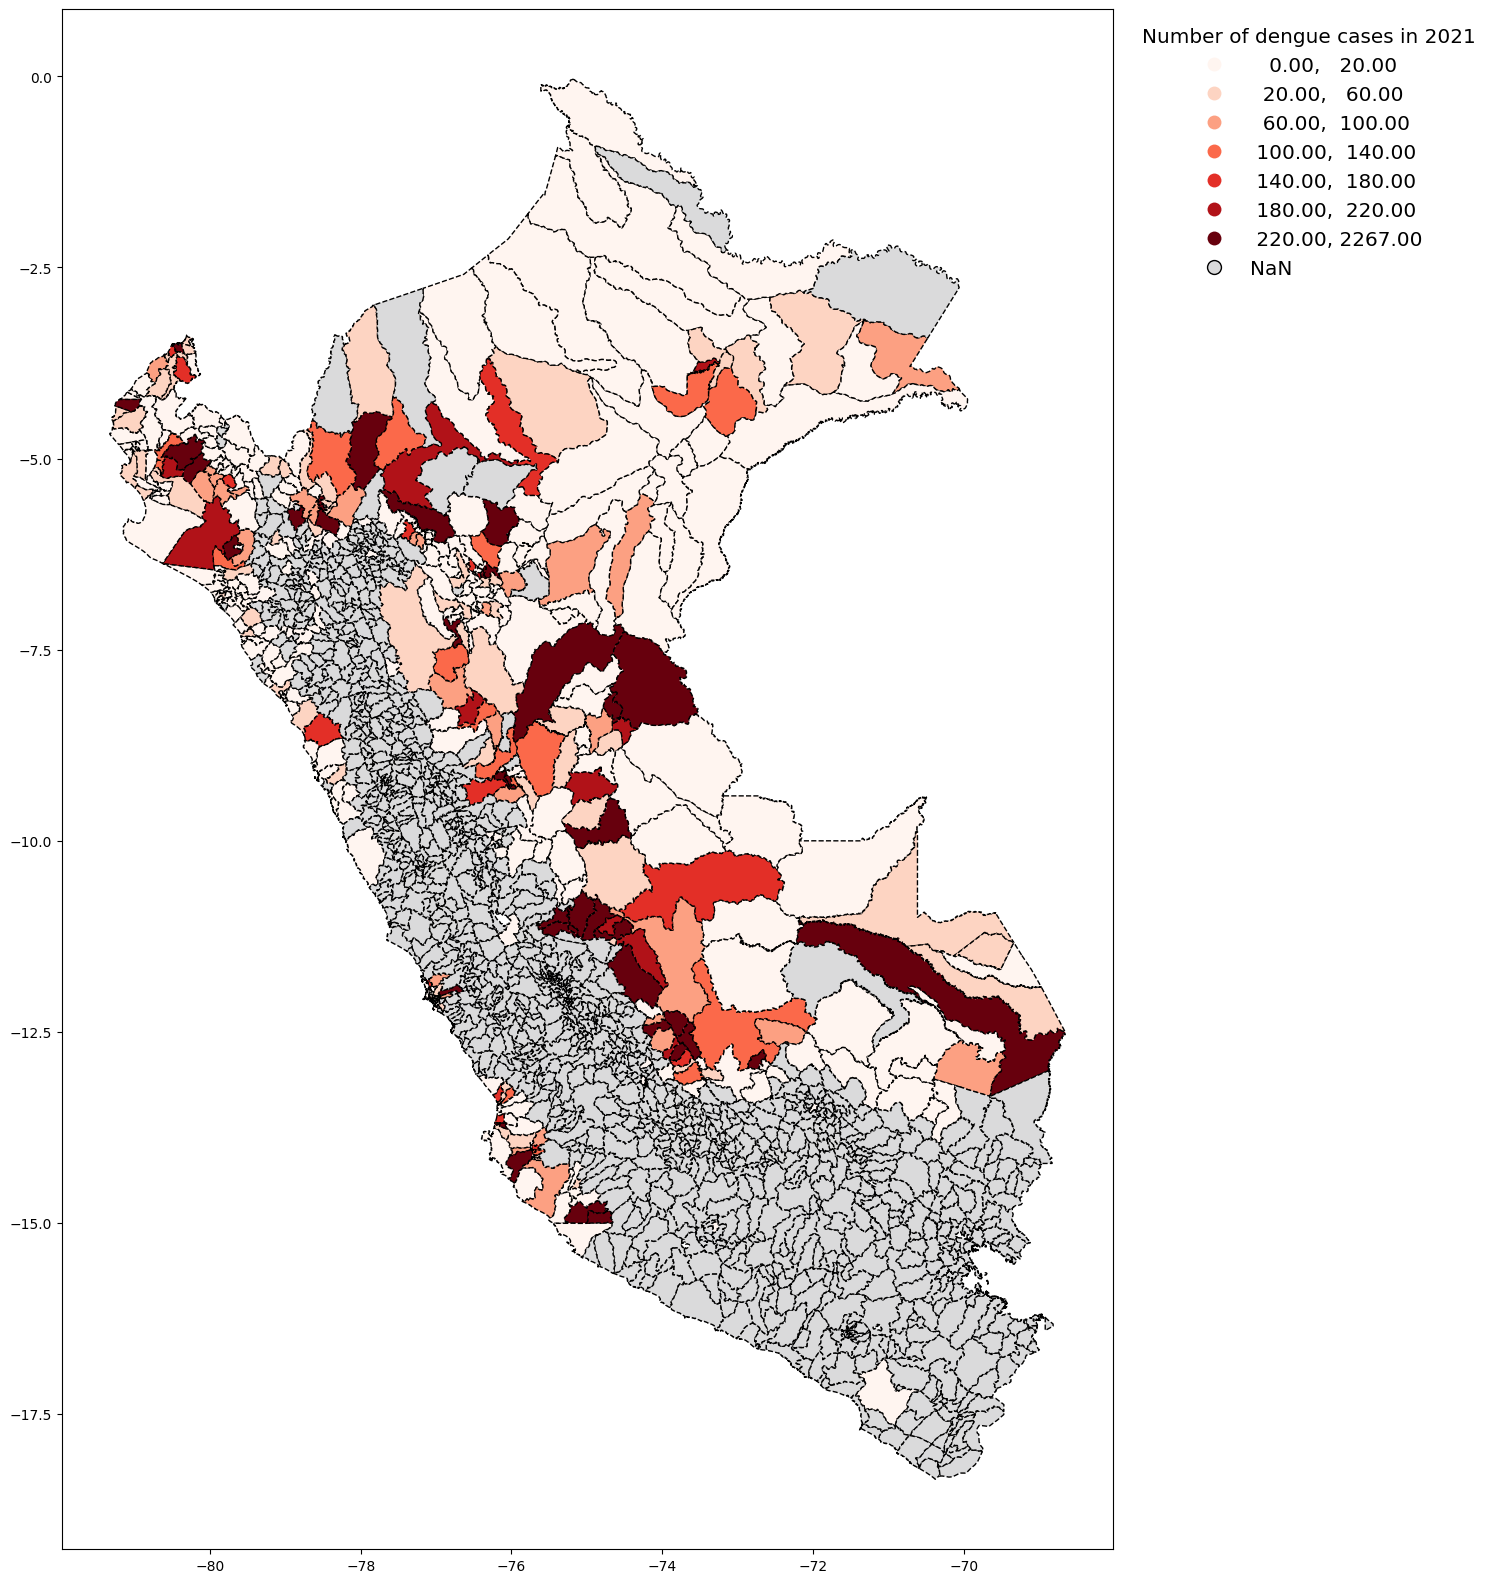

In [24]:
map_dist.plot( column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True,
              scheme = "User_Defined", 
          missing_kwds= dict(color = "#DADADB",), 
          classification_kwds = dict( bins = [ 20, 60, 100, 140, 180, 220] ), 
          legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of dengue cases in 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False ) )

## Question 4.

Use geopandas to plot the number of cases in 2021by the province using a continuous legend. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the province level.

In [27]:
prov_2021_dengue = new_data_2021.groupby( ['Ubigeo_Provincia'], as_index = False )[['Casos']]\
  .sum()

In [28]:
maps2 = gpd.read_file(r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp')

In [29]:
maps2["Ubigeo_Provincia"] = maps2["UBIGEO"].str[0:4]

In [30]:
maps2 = maps2[['Ubigeo_Provincia', 'geometry']]

In [31]:
map_prov = maps2.merge(prov_2021_dengue, how="outer", on="Ubigeo_Provincia")

<Axes: >

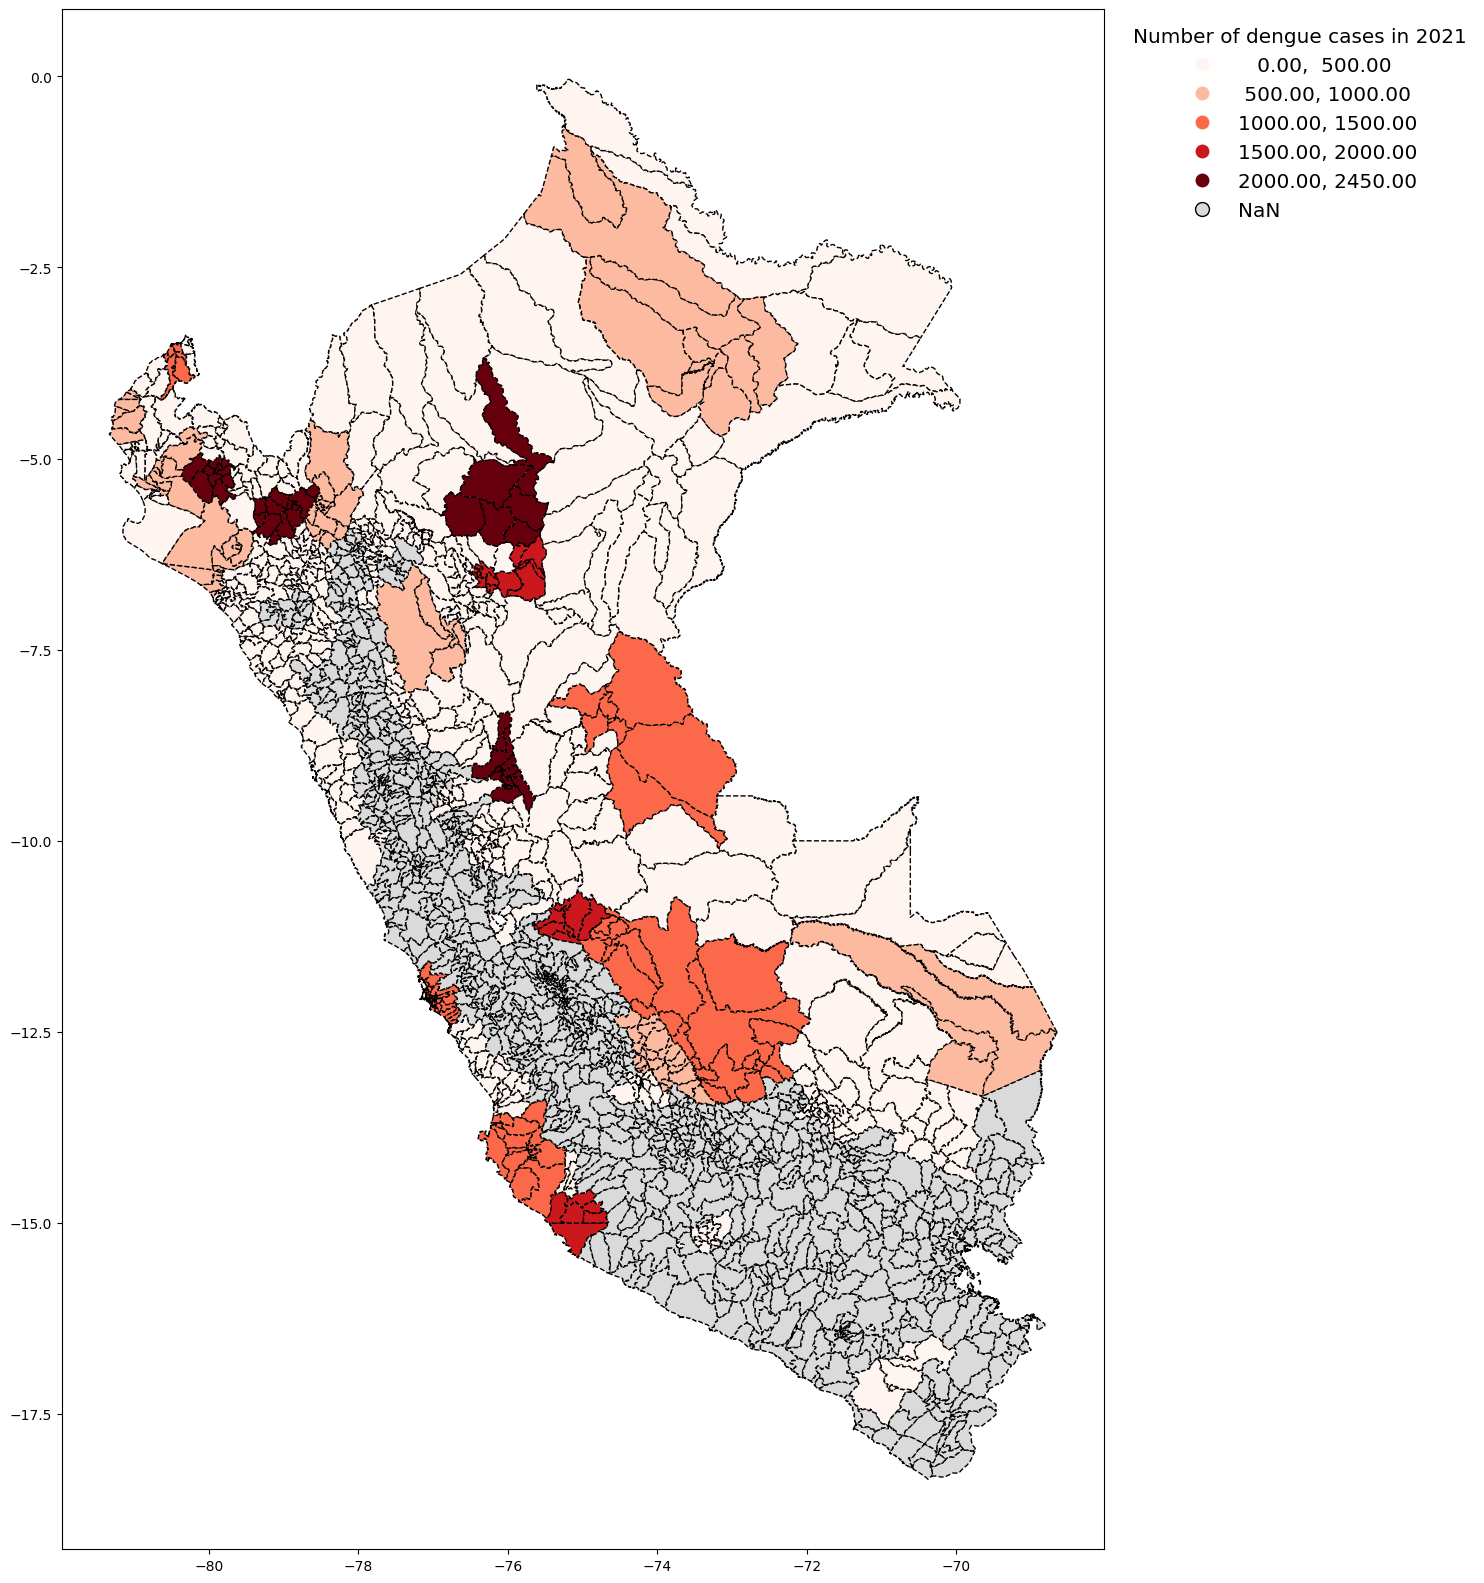

In [32]:
map_prov.plot( column='Casos', cmap='Reds', figsize=(20, 20), linestyle='--',
                      edgecolor='black', 
                      legend = True,
              scheme = "User_Defined", 
          missing_kwds= dict(color = "#DADADB",), 
          classification_kwds = dict( bins = [ 500, 1000, 1500, 2000] ), 
          legend_kwds=dict(  loc='upper left',
                            bbox_to_anchor=(1.01, 1),
                            fontsize='x-large',
                            title= "Number of dengue cases in 2021", 
                            title_fontsize = 'x-large', 
                            frameon= False )          )

## Question 5.

Use geopandas to plot the number of cases by the department for all the years using subplots. Every subplot for each year. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level.

In [48]:
# We create a subset retaining only columns of interest
dep_data_anio = new_data[ [ 'Departamento', 'Casos', 'Año' ] ]
dep_data_anio = dep_data_anio.groupby( [ 'Departamento', 'Año' ] ).sum().reset_index()
dep_data_anio = dep_data_anio.rename( columns = { 'Departamento': 'NOMBDEP' } )
dep_data_anio

,NOMBDEP,Año,Casos
0,AMAZONAS,2015,37
1,AMAZONAS,2016,90
2,AMAZONAS,2017,93
3,AMAZONAS,2018,109
4,AMAZONAS,2019,164
...,...,...,...
142,UCAYALI,2017,779
143,UCAYALI,2018,317
144,UCAYALI,2019,214
145,UCAYALI,2020,10934


In [46]:
dist_shp = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp' )
dist_shp = dist_shp[ [ 'NOMBDEP', 'geometry' ] ]
dep_shp = dist_shp.dissolve( by = 'NOMBDEP', aggfunc='sum' )
dep_shp = dep_shp.reset_index()
dep_shp

,NOMBDEP,geometry
0,AMAZONAS,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,ANCASH,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
2,APURIMAC,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
3,AREQUIPA,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
4,AYACUCHO,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1..."
5,CAJAMARCA,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462..."
6,CALLAO,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0..."
7,CUSCO,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7..."
8,HUANCAVELICA,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."
9,HUANUCO,"POLYGON ((-76.80833 -10.39296, -76.81024 -10.3..."


In [49]:
# We merge the department data with the departaments shapefie

bd_anios = dep_data_anio.merge( dep_shp, how = 'outer', on = 'NOMBDEP' )
bd_anios

,NOMBDEP,Año,Casos,geometry
0,AMAZONAS,2015.0,37.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,AMAZONAS,2016.0,90.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,AMAZONAS,2017.0,93.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,AMAZONAS,2018.0,109.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,AMAZONAS,2019.0,164.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
...,...,...,...,...
146,UCAYALI,2021.0,1613.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
147,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
148,AREQUIPA,NaN,NaN,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
149,HUANCAVELICA,NaN,NaN,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."


In [69]:
bd_anios_m = bd_anios[bd_anios["Año"].isna()==True]

In [70]:
bd_anios_m.loc[bd_anios_m.index.repeat(7)].reset_index(drop=True)

,NOMBDEP,Año,Casos,geometry
0,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
1,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
2,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
3,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
4,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
5,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
6,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
7,AREQUIPA,NaN,NaN,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
8,AREQUIPA,NaN,NaN,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
9,AREQUIPA,NaN,NaN,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."


,Año,Casos,geometry
NOMBDEP,,,
APURIMAC,0,0,1
AREQUIPA,0,0,1
HUANCAVELICA,0,0,1
TACNA,0,0,1


,NOMBDEP,Año,Casos,geometry,position
147,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5...",2015
148,AREQUIPA,NaN,NaN,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6...",2015
149,HUANCAVELICA,NaN,NaN,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0...",2015
150,TACNA,NaN,NaN,"POLYGON ((-70.33515 -18.31557, -70.34540 -18.3...",2015


## Question 6.

Use geopandas to plot the number of cases by the department for all 2021 quarters using subplots. Every subplot for each quarter. Use a categorical legend with 5 bins. Do not forget to indicate the color of NA values. Use this shapefile. For this task, you will have to aggregate shapefiles at the department level. Hint: Use Semana variable to group by quarters.

In [33]:
# First we define a function to get the quarters based on weeks

def get_quarter(week):
    if week <= 13:
        return 'Q1'
    elif week <= 26:
        return 'Q2'
    elif week <= 39:
        return 'Q3'
    else:
        return 'Q4'

In [34]:
# We apply this function using the lambda function
new_data_2021['quarters'] = new_data_2021['Semana'].apply(lambda x: get_quarter(x))

C:\Users\User\AppData\Local\Temp\ipykernel_18240\2177779819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data_2021['quarters'] = new_data_2021['Semana'].apply(lambda x: get_quarter(x))


In [35]:
# We verify the number of quarters
new_data_2021[ 'quarters' ].value_counts()

Q4    6566
Q1    6097
Q2    6097
Q3    6097
Name: quarters, dtype: int64

In [36]:
# We create a subset retaining only columns of interest
dep_data = new_data_2021[ [ 'Departamento', 'Casos', 'quarters' ] ]
dep_data = dep_data.groupby( [ 'Departamento', 'quarters' ] ).sum().reset_index()
dep_data = dep_data.rename( columns = { 'Departamento': 'NOMBDEP' } )
dep_data

,NOMBDEP,quarters,Casos
0,AMAZONAS,Q1,599
1,AMAZONAS,Q2,609
2,AMAZONAS,Q3,583
3,AMAZONAS,Q4,39
4,ANCASH,Q1,3
...,...,...,...
79,TUMBES,Q4,14
80,UCAYALI,Q1,923
81,UCAYALI,Q2,214
82,UCAYALI,Q3,424


In [37]:
# We read and retain columns of interest from the shapefile. Then we group by region ussing dissolve function

dist_shp = gpd.read_file( r'../../_data/LIMITE_DISTRITAL_2020_INEI/INEI_LIMITE_DISTRITAL.shp' )
dist_shp = dist_shp[ [ 'NOMBDEP', 'geometry' ] ]
dep_shp = dist_shp.dissolve( by = 'NOMBDEP', aggfunc='sum' )
dep_shp = dep_shp.reset_index()
dep_shp

,NOMBDEP,geometry
0,AMAZONAS,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,ANCASH,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
2,APURIMAC,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
3,AREQUIPA,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
4,AYACUCHO,"POLYGON ((-74.50188 -15.16058, -74.50191 -15.1..."
5,CAJAMARCA,"POLYGON ((-79.07326 -7.46865, -79.08528 -7.462..."
6,CALLAO,"POLYGON ((-77.10456 -12.06373, -77.10449 -12.0..."
7,CUSCO,"POLYGON ((-71.89418 -14.78954, -71.89579 -14.7..."
8,HUANCAVELICA,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."
9,HUANUCO,"POLYGON ((-76.80833 -10.39296, -76.81024 -10.3..."


In [38]:
# We merge the department data with the departaments shapefie

dep_final = dep_data.merge( dep_shp, how = 'outer', on = 'NOMBDEP' )
dep_final

,NOMBDEP,quarters,Casos,geometry
0,AMAZONAS,Q1,599.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,AMAZONAS,Q2,609.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,AMAZONAS,Q3,583.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,AMAZONAS,Q4,39.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,ANCASH,Q1,3.0,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
...,...,...,...,...
83,UCAYALI,Q4,52.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
84,APURIMAC,NaN,NaN,"POLYGON ((-73.51174 -14.53852, -73.51368 -14.5..."
85,AREQUIPA,NaN,NaN,"POLYGON ((-72.72968 -16.64631, -72.73106 -16.6..."
86,HUANCAVELICA,NaN,NaN,"POLYGON ((-75.23983 -14.04591, -75.25853 -14.0..."


In [41]:
# Group the data by department
grouped = dep_final.groupby('NOMBDEP')

# Define a function to check for missing quarters and reindex the group
def add_missing_quarters(group):
    quarters = ['Q1', 'Q2', 'Q3', 'Q4']
    missing_quarters = list(set(quarters) - set(group.quarters))
    if len(missing_quarters) > 0:
        missing_data = pd.DataFrame({
            'NOMBDEP': group.NOMBDEP.iloc[0],
            'quarters': missing_quarters,
            'Casos': None,
            'geometry': group.geometry.iloc[0]
        })
        group = pd.concat([group, missing_data])
    return group

# Apply the function to each group
df = grouped.apply(add_missing_quarters)

# Reset the index of the dataframe and drop missings in the quarters column
df = df.reset_index(drop=True)
df = df.dropna( subset = 'quarters' )
df

,NOMBDEP,quarters,Casos,geometry
0,AMAZONAS,Q1,599.0,POLYGON ((-78.03471723721071 -6.74208097465719...
1,AMAZONAS,Q2,609.0,POLYGON ((-78.03471723721071 -6.74208097465719...
2,AMAZONAS,Q3,583.0,POLYGON ((-78.03471723721071 -6.74208097465719...
3,AMAZONAS,Q4,39.0,POLYGON ((-78.03471723721071 -6.74208097465719...
4,ANCASH,Q1,3.0,POLYGON ((-77.70188636236571 -10.3239187279668...
...,...,...,...,...
99,TUMBES,Q4,14.0,POLYGON ((-80.39846998899873 -3.98042997166578...
100,UCAYALI,Q1,923.0,POLYGON ((-75.12007746270473 -8.90433702023722...
101,UCAYALI,Q2,214.0,POLYGON ((-75.12007746270473 -8.90433702023722...
102,UCAYALI,Q3,424.0,POLYGON ((-75.12007746270473 -8.90433702023722...


In [42]:
# We convert out pandas dataframe to a geopandas dataframe

from geopandas import GeoDataFrame
df = GeoDataFrame(df)
df

,NOMBDEP,quarters,Casos,geometry
0,AMAZONAS,Q1,599.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
1,AMAZONAS,Q2,609.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
2,AMAZONAS,Q3,583.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
3,AMAZONAS,Q4,39.0,"POLYGON ((-78.03472 -6.74208, -78.03451 -6.741..."
4,ANCASH,Q1,3.0,"POLYGON ((-77.70189 -10.32392, -77.70434 -10.3..."
...,...,...,...,...
99,TUMBES,Q4,14.0,"POLYGON ((-80.39847 -3.98043, -80.39860 -3.980..."
100,UCAYALI,Q1,923.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
101,UCAYALI,Q2,214.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."
102,UCAYALI,Q3,424.0,"POLYGON ((-75.12008 -8.90434, -75.12004 -8.904..."


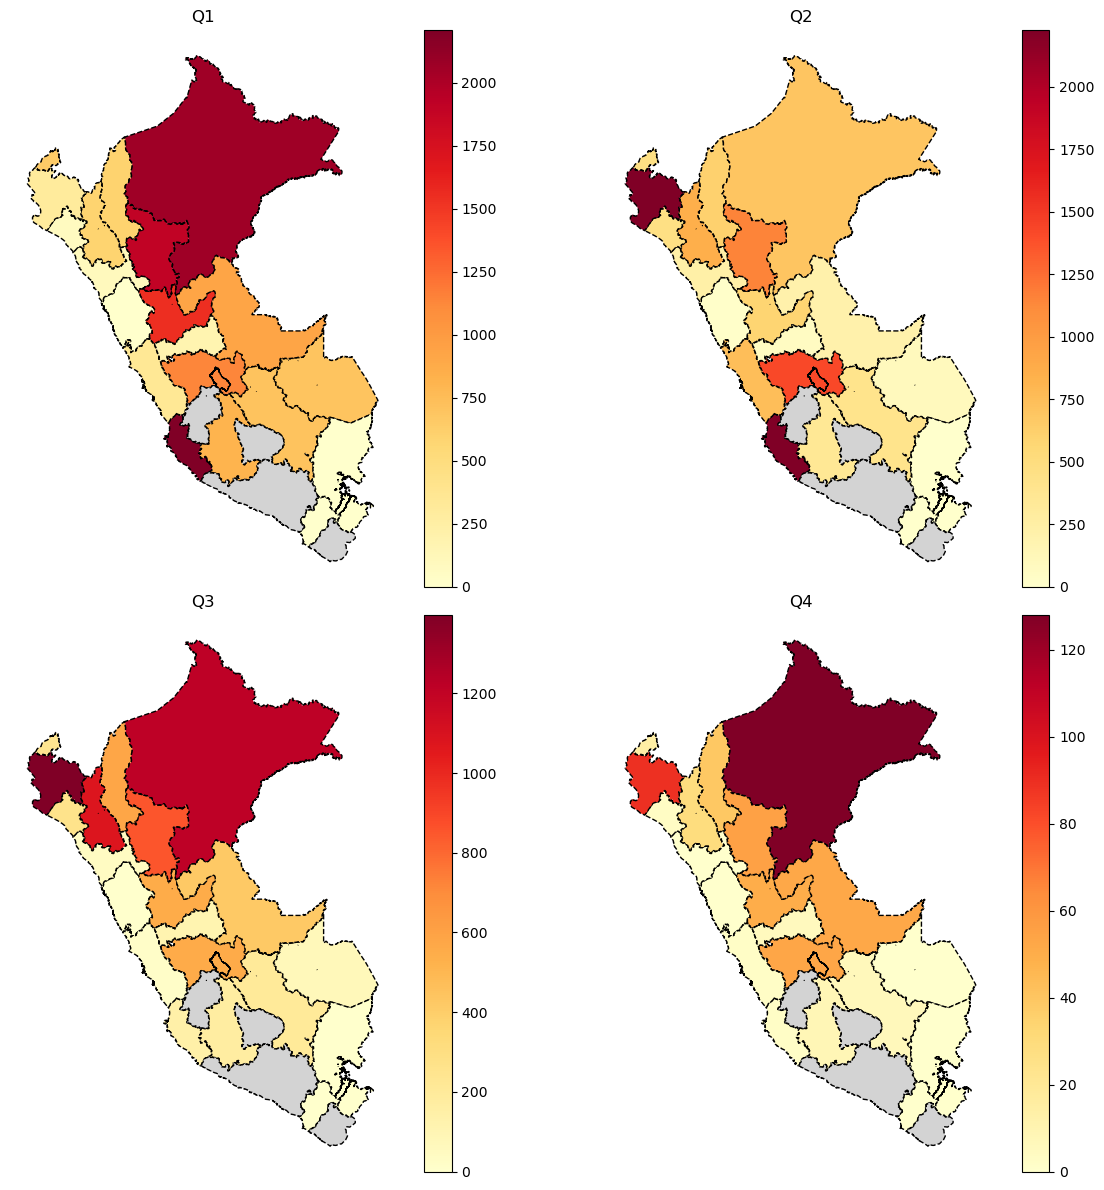

In [188]:
# We plot 

fig, axes = plt.subplots( nrows=2, ncols=2, figsize=(12, 12 ))
axes = axes.flatten()

# loop over the quarters and plot the number of cases by department for each quarter
quarters = df['quarters'].unique()
for i, quarter in enumerate(quarters):
    # filter the dataset to only include data for the current quarter
    gdf_quarter = df[df['quarters'] == quarter]
    
    # plot the number of cases by department
    ax = gdf_quarter.plot( column='Casos', 
                           ax=axes[ i ], 
                           cmap='YlOrRd', 
                           legend = True,
                           linestyle='--',
                           edgecolor='black', 
                           missing_kwds={ 'color': 'lightgrey' },
                           classification_kwds = dict( bins = [ 400, 800, 1200, 1600, 2000 ] )
                         )
    
    ax.set_title(quarter)
    ax.set_axis_off()
    
# adjust the layout and spacing of the subplots
plt.tight_layout()
plt.subplots_adjust(hspace=0.05, wspace=0.05)

# show the plot
plt.show()